# Statistics using Nyxus

The [Nyxus](https://github.com/PolusAI/nyxus) library contains a large number of features that can be extracted from image data. It can be installed using pip:

<!--
```
mamba install nyxus -c conda-forge
```
-->
```
pip install nyxus==0.5.0
```

See also
* [Nyxus documentation](https://nyxus.readthedocs.io/en/latest/)
* [Nyxus list of features](https://nyxus.readthedocs.io/en/latest/featurelist.html)

Before we can do measurements, we need an `image` and a corresponding `label_image`. Therefore, we recapitulate filtering, thresholding and labeling:

In [1]:
from skimage.io import imread
import stackview

from nyxus import Nyxus

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
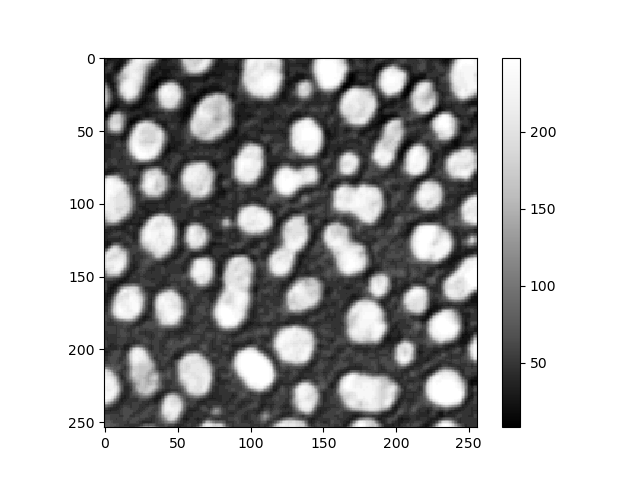
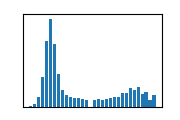

In [2]:
intensity_image = imread("../../data/blobs.tif")

stackview.insight(intensity_image)

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
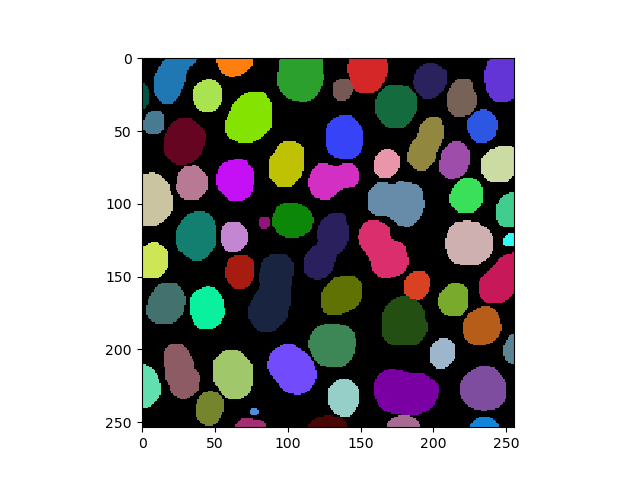

In [3]:
label_image = imread("../../data/blobs_labeled.tif")

# visualization
stackview.insight(label_image)

## Measurements

We now use nyxus' function [featurize](https://nyxus.readthedocs.io/en/latest/References/stubs/nyxus.Nyxus.html#nyxus.Nyxus.featurize) to extract quantitative measurements. For the beginning, we just use `ALL` features.

In [4]:
nyx = Nyxus(["*ALL*"])
features = nyx.featurize(intensity_image, label_image)
features

,mask_image,intensity_image,label,INTEGRATED_INTENSITY,MEAN,MEDIAN,MIN,MAX,RANGE,STANDARD_DEVIATION,...,WEIGHTED_HU_M5,WEIGHTED_HU_M6,WEIGHTED_HU_M7,GABOR_0,GABOR_1,GABOR_2,GABOR_3,GABOR_4,GABOR_5,GABOR_6
0,Segmentation0,Intensity0,1,98336.0,159.119741,176.0,40.0,232.0,192.0,56.038438,...,2.775224e-31,4.901126e-10,2.447020e-32,0.227322,0.0,0.0,0.800000,0.755191,0.726776,0.710383
1,Segmentation0,Intensity0,2,41104.0,148.389892,168.0,48.0,224.0,176.0,48.834751,...,1.865947e-12,1.094818e-03,-2.652105e-12,0.375358,0.0,0.0,0.922636,0.899713,0.888252,0.856734
2,Segmentation0,Intensity0,3,151632.0,178.180964,200.0,40.0,248.0,208.0,57.811867,...,5.235402e-13,3.374755e-04,-9.289798e-13,0.064581,0.0,0.0,0.957619,0.945510,0.926337,0.913219
3,Segmentation0,Intensity0,4,106800.0,181.942078,208.0,24.0,248.0,224.0,68.344166,...,-2.119980e-10,3.721221e-03,7.231199e-10,0.018598,0.0,0.0,0.932761,0.925608,0.907010,0.879828
4,Segmentation0,Intensity0,5,110136.0,188.266667,216.0,40.0,248.0,208.0,57.713131,...,9.503623e-06,-5.115360e-03,4.167152e-06,0.000000,0.0,0.0,0.976923,0.972308,0.953846,0.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Segmentation0,Intensity0,59,2752.0,105.846154,104.0,88.0,136.0,48.0,14.004834,...,NaN,NaN,NaN,inf,inf,inf,inf,inf,inf,inf
59,Segmentation0,Intensity0,60,22632.0,136.337349,140.0,48.0,216.0,168.0,54.780505,...,NaN,NaN,NaN,0.754808,0.0,0.0,0.966346,0.956731,0.927885,0.889423
60,Segmentation0,Intensity0,61,20040.0,137.260274,132.0,40.0,248.0,208.0,59.842097,...,NaN,NaN,NaN,0.812500,0.0,0.0,0.988636,0.977273,0.954545,0.914773
61,Segmentation0,Intensity0,62,14320.0,132.592593,120.0,40.0,248.0,208.0,63.382099,...,NaN,NaN,NaN,0.812030,0.0,0.0,0.977444,0.969925,0.932331,0.894737


This table has a huge number of columns.

In [5]:
print([f for f in features.columns])

['mask_image', 'intensity_image', 'label', 'INTEGRATED_INTENSITY', 'MEAN', 'MEDIAN', 'MIN', 'MAX', 'RANGE', 'STANDARD_DEVIATION', 'STANDARD_ERROR', 'SKEWNESS', 'KURTOSIS', 'HYPERSKEWNESS', 'HYPERFLATNESS', 'MEAN_ABSOLUTE_DEVIATION', 'ENERGY', 'ROOT_MEAN_SQUARED', 'ENTROPY', 'MODE', 'UNIFORMITY', 'UNIFORMITY_PIU', 'P01', 'P10', 'P25', 'P75', 'P90', 'P99', 'INTERQUARTILE_RANGE', 'ROBUST_MEAN_ABSOLUTE_DEVIATION', 'AREA_PIXELS_COUNT', 'AREA_UM2', 'CENTROID_X', 'CENTROID_Y', 'WEIGHTED_CENTROID_Y', 'WEIGHTED_CENTROID_X', 'MASS_DISPLACEMENT', 'COMPACTNESS', 'BBOX_YMIN', 'BBOX_XMIN', 'BBOX_HEIGHT', 'BBOX_WIDTH', 'DIAMETER_EQUAL_AREA', 'EXTENT', 'ASPECT_RATIO', 'MAJOR_AXIS_LENGTH', 'MINOR_AXIS_LENGTH', 'ECCENTRICITY', 'ELONGATION', 'ORIENTATION', 'ROUNDNESS', 'PERIMETER', 'DIAMETER_EQUAL_PERIMETER', 'EDGE_MEAN_INTENSITY', 'EDGE_STDDEV_INTENSITY', 'EDGE_MAX_INTENSITY', 'EDGE_MIN_INTENSITY', 'EDGE_INTEGRATED_INTENSITY', 'CIRCULARITY', 'CONVEX_HULL_AREA', 'SOLIDITY', 'EROSIONS_2_VANISH', 'EROSIONS

Thus, one can also request only specific columns, which should also be faster.

In [6]:
nyx = Nyxus(['ORIENTATION', 'PERIMETER'])
features = nyx.featurize(intensity_image, label_image)
features

,mask_image,intensity_image,label,ORIENTATION,PERIMETER
0,Segmentation0,Intensity0,1,54.267520,90.0
1,Segmentation0,Intensity0,2,85.152921,60.0
2,Segmentation0,Intensity0,3,82.808942,101.0
3,Segmentation0,Intensity0,4,86.016115,83.0
4,Segmentation0,Intensity0,5,86.626543,86.0
...,...,...,...,...,...
58,Segmentation0,Intensity0,59,17.474954,14.0
59,Segmentation0,Intensity0,60,27.004816,55.0
60,Segmentation0,Intensity0,61,35.594028,48.0
61,Segmentation0,Intensity0,62,43.113311,40.0


Nyxus also defines [feature groups](https://github.com/PolusAI/nyxus#feature-groups) in case one is interested in all shape parameters for example:

In [7]:
nyx = Nyxus(['*ALL_MORPHOLOGY*'])
features = nyx.featurize(intensity_image, label_image)
features

,mask_image,intensity_image,label,AREA_PIXELS_COUNT,AREA_UM2,CENTROID_X,CENTROID_Y,WEIGHTED_CENTROID_Y,WEIGHTED_CENTROID_X,MASS_DISPLACEMENT,...,ROUNDNESS,PERIMETER,DIAMETER_EQUAL_PERIMETER,EDGE_MEAN_INTENSITY,EDGE_STDDEV_INTENSITY,EDGE_MAX_INTENSITY,EDGE_MIN_INTENSITY,CIRCULARITY,CONVEX_HULL_AREA,SOLIDITY
0,Segmentation0,Intensity0,1,618.0,618.0,13.996764,19.925566,20.964692,14.569964,1.186736,...,0.556444,90.0,28.647890,89.511111,54.640242,232.0,40.0,0.979167,723.0,0.854772
1,Segmentation0,Intensity0,2,277.0,277.0,5.386282,62.841155,64.028221,5.826781,1.266162,...,0.538386,60.0,19.098593,108.400000,56.037276,200.0,48.0,0.983317,404.5,0.684796
2,Segmentation0,Intensity0,3,851.0,851.0,13.683901,108.360752,109.423605,14.046006,1.122842,...,0.955491,101.0,32.149299,99.881188,67.339036,240.0,40.0,1.023878,1007.5,0.844665
3,Segmentation0,Intensity0,4,587.0,587.0,10.768313,154.402044,155.352659,11.091610,1.004086,...,0.897266,83.0,26.419721,95.807229,66.335154,248.0,24.0,1.034775,699.0,0.839771
4,Segmentation0,Intensity0,5,585.0,585.0,14.471795,245.709402,247.626062,14.553933,1.918420,...,0.652867,86.0,27.374650,133.209302,77.210349,240.0,40.0,0.996975,1265.0,0.462451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Segmentation0,Intensity0,59,26.0,26.0,243.000000,76.500000,77.497093,243.941860,1.371603,...,0.831872,14.0,4.456338,95.428571,7.334998,112.0,88.0,1.291111,334.0,0.077844
59,Segmentation0,Intensity0,60,166.0,166.0,250.192771,127.439759,128.530223,251.759279,1.908680,...,0.285586,55.0,17.507044,119.127273,66.571892,216.0,48.0,0.830417,1251.5,0.132641
60,Segmentation0,Intensity0,61,146.0,146.0,250.089041,178.952055,179.750499,251.684232,1.783857,...,0.346108,48.0,15.278875,115.166667,71.587273,248.0,40.0,0.892360,1038.0,0.140655
61,Segmentation0,Intensity0,62,108.0,108.0,250.518519,234.500000,235.496648,252.100559,1.869802,...,0.360323,40.0,12.732395,119.600000,75.242105,248.0,40.0,0.920994,813.0,0.132841


## Exercise

Make a table with only `solidity`, `circularity` and `roundness`.